In [ ]:
## First create a virtual environment and activate it
%%bash
python3 -m venv ai4ph
source ai4ph/bin/activate

In [ ]:
# Install dependencies
%%bash
pip install matplotlib scikit-learn pandas numpy notebook


In [ ]:
# Freeze dependencies
%%bash
pip freeze > requirements.txt

# Deaths Involving COVID-19 by Fatality Type 

### Overview
The dataset used in this analysis contains the daily reported number of deaths involving COVID-19 by fatality type.
<br>
<br>
Data include:<br>

- Date on which the death occurred 
- Total number of deaths involving COVID-19
- Number of deaths with “COVID-19 as the underlying cause of death”
- Number of deaths with “COVID-19 contributed but not underlying cause”
- Number of deaths where the “Cause of death unknown” or “Cause of death missing”

In [10]:
# Custom python function to download and save a file from a url to csv 
import urllib.request

def download_file(url, file_name):
    try:
        request = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        with urllib.request.urlopen(request) as response:
                if response.status == 200:
                    with open(file_name, "wb") as f:
                        f.write(response.read())
                        print(f"URL content written to '{file_name}' successfully.")
                else:
                 print(f"Failed to fetch URL. Status code: {response.status}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [17]:
# Download the dataset
url = "https://data.ontario.ca/dataset/c43fd28d-3288-4ad2-87f1-a95abac706b8/resource/3273c977-416f-407e-86d2-1e45a7261e7b/download/deaths_fatality_type.csv"
download_file(url, "covidData.csv")

URL content written to 'covidData.csv' successfully.


Let's start by importing the <em>pandas</em> and the <em>matplotlib</em> libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5)


In [2]:
covid_data = pd.read_csv("covidData.csv")

In [3]:
covid_data

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,2020-04-01,16,11,2,3
1,2020-04-02,29,23,2,4
...,...,...,...,...,...
1322,2023-11-14,1,1,0,0
1323,2023-11-15,0,0,0,0


So there are 1324 records split across 5 columns in the dataset. The date ranges from April 1<sup>st</sup> 2020 to November 15<sup>th</sup> 2023. The first date had 16 total deaths, with 11 of these caused by Covid primarily, 2 of these are listed as being caused by Covid secondarily and 3 have an unknown/missing cause.

In [4]:
covid_data.dtypes

date                     object
deaths_total              int64
death_covid               int64
death_covid_contrib       int64
death_unknown_missing     int64
dtype: object

In [5]:
# convert the date column to datetime format for accurate time-series analysis
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y-%m-%d')

#### Let's print out some summary statistics...


In [6]:
# prints a high-level summary of the attributes of a given column
covid_data.describe()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
count,1324,1324.000000,1324.000000,1324.000000,1324.000000
mean,2022-01-22 12:00:00,12.874622,9.138973,2.983384,0.752266
...,...,...,...,...,...
max,2023-11-15 00:00:00,86.000000,67.000000,22.000000,13.000000
std,NaN,14.510798,10.709044,3.360843,1.584301


In [7]:
covid_data.isnull().sum()

date                     0
deaths_total             0
death_covid              0
death_covid_contrib      0
death_unknown_missing    0
dtype: int64

No missing data...yayy!

### Summary Statistics


In [8]:
mean_total_deaths = covid_data['deaths_total'].mean()
std_death_covid = covid_data['death_covid'].std()

print(f"Mean of Total Deaths: {mean_total_deaths}")
print(f"Standard Deviation of Deaths Attributed to COVID-19: {std_death_covid}")

Mean of Total Deaths: 12.874622356495468
Standard Deviation of Deaths Attributed to COVID-19: 10.709043832469849


- **Mean Total Deaths**: The average of total number of deaths recorded in the dataset was calculated to be approximately 12.87, with min and max values between 0 and 86.
- **Standard Deviation of Total Deaths**: The standard deviation for total deaths attributed to covid as the primary cause was found to be 10.70.

#### Let's visualize the data...


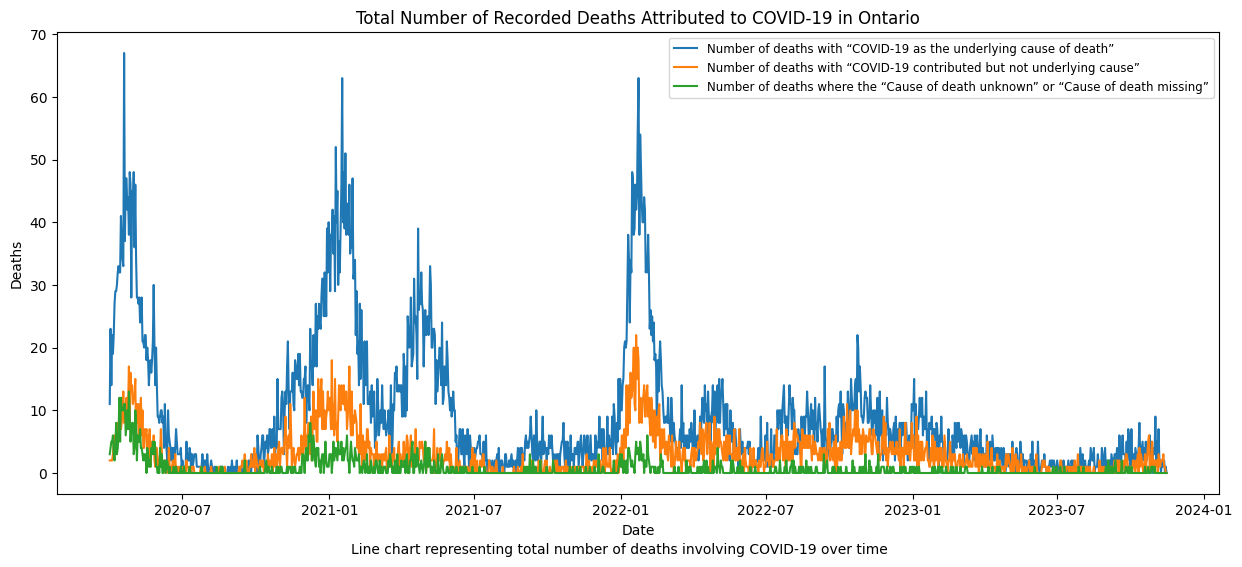

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(covid_data['date'], covid_data['death_covid'], label='Number of deaths with “COVID-19 as the underlying cause of death”')
plt.plot(covid_data['date'], covid_data['death_covid_contrib'], label='Number of deaths with “COVID-19 contributed but not underlying cause”')
plt.plot(covid_data['date'], covid_data['death_unknown_missing'], label='Number of deaths where the “Cause of death unknown” or “Cause of death missing”')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Total Number of Recorded Deaths Attributed to COVID-19 in Ontario')
plt.figtext(0.5, 0.01, "Line chart representing total number of deaths involving COVID-19 over time", ha="center", fontsize=10, wrap=True)
plt.legend(fontsize=8.5)
plt.show()

## Summary



### Observations from the Visualization
- There is a noticeable trend in the cases over the observed period.
- Significant peaks with Covid-19 being the primary cause of death were observed around the end/beginning of the year and at the start of the pandemic.
- Further analysis could focus on the specific drivers/implications of these peaks.


